In [1]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
import numpy as np
import os
from PIL import Image,ImageOps
from sklearn.preprocessing import StandardScaler


In [2]:
list = os.listdir("./A3/dataset")

## Loading Image

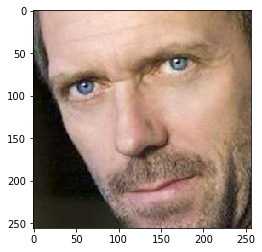

In [3]:
img = Image.open('./A3/dataset/'+list[115])
plt.imshow(img) 


### Downscaling

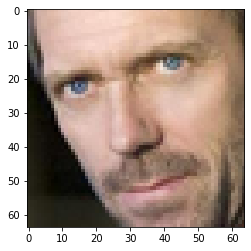

In [4]:
img.thumbnail((64, 64), Image.ANTIALIAS)
plt.imshow(img)

### Conversion to grayscale

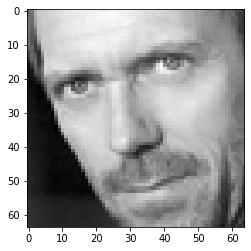

In [5]:
img = ImageOps.grayscale(img)  
plt.imshow(img,cmap=plt.get_cmap("gray"))


In [10]:
images=[]

for i in range(len(list)):
    img = Image.open('./A3/dataset/'+list[i])
    img.thumbnail((64, 64), Image.ANTIALIAS)
    img = ImageOps.grayscale(img)
    img=np.array(img)
    images.append(img)
    
images=np.array(images)

In [11]:
flatten_images=[]
for i in range(len(images)):
    flatten_images.append(images[i].flatten())
flatten_images=np.array(flatten_images) 
flatten_images
standardized_data=flatten_images

In [12]:
standardized_data = StandardScaler().fit_transform(flatten_images)
standardized_data

array([[-1.35063538, -1.34452032, -1.44756874, ..., -1.08748498,
        -0.9051786 , -1.22600908],
       [ 0.29012589,  0.51058277,  0.30325622, ...,  0.97272179,
         1.06085367,  1.00645721],
       [ 0.78066276,  1.14612735,  1.28915765, ..., -1.18427322,
        -1.13890272, -1.21247898],
       ...,
       [ 0.64534225,  0.20139892,  0.08227831, ..., -1.32254213,
        -1.30388445, -1.29365957],
       [-0.08200553,  0.046807  ,  0.23526302, ...,  0.83445287,
         0.90962042,  0.87115622],
       [-0.47105202, -0.6574451 , -0.58065541, ..., -0.76946649,
        -0.78144231, -0.86069641]])

In [13]:
cov = np.cov(standardized_data.T)
cov

array([[ 1.00192678,  0.95015633,  0.86937004, ..., -0.02489056,
        -0.00349899,  0.02125046],
       [ 0.95015633,  1.00192678,  0.95185047, ..., -0.05708212,
        -0.03022428, -0.01067752],
       [ 0.86937004,  0.95185047,  1.00192678, ..., -0.07213719,
        -0.04489918, -0.02751042],
       ...,
       [-0.02489056, -0.05708212, -0.07213719, ...,  1.00192678,
         0.97019769,  0.92165619],
       [-0.00349899, -0.03022428, -0.04489918, ...,  0.97019769,
         1.00192678,  0.9736115 ],
       [ 0.02125046, -0.01067752, -0.02751042, ...,  0.92165619,
         0.9736115 ,  1.00192678]])

In [14]:
eig_vals, eig_vecs = np.linalg.eig(cov)

In [15]:
eig_vals.shape

(4096,)

In [16]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

eig_pairs.sort(key=lambda x: x[0], reverse=True)

In [17]:
len(eig_pairs)

4096

In [18]:
p_vec=[]
for i in range(1000):
    p_vec.append(eig_pairs[i][1])
p_vec=np.array(p_vec)
p_vec.shape
p_vec


array([[ 0.00612159+0.00000000e+00j,  0.00662727+0.00000000e+00j,
         0.00781419+0.00000000e+00j, ..., -0.00025867+0.00000000e+00j,
        -0.00080858+0.00000000e+00j, -0.00116856+0.00000000e+00j],
       [-0.01168378+0.00000000e+00j, -0.01248086+0.00000000e+00j,
        -0.01345946+0.00000000e+00j, ...,  0.01493326+0.00000000e+00j,
         0.01367241+0.00000000e+00j,  0.01316488+0.00000000e+00j],
       [ 0.01873091+0.00000000e+00j,  0.01713762+0.00000000e+00j,
         0.01450495+0.00000000e+00j, ...,  0.02745133+0.00000000e+00j,
         0.02791738+0.00000000e+00j,  0.0282491 +0.00000000e+00j],
       ...,
       [ 0.00064533-1.91325632e-05j,  0.00029606+6.59046223e-05j,
        -0.00028633-1.68016889e-04j, ...,  0.01833468+3.80863727e-03j,
        -0.0228804 +4.24522719e-03j, -0.02197147+3.93075123e-03j],
       [-0.001722  -1.13588463e-03j, -0.00011525+7.29834299e-05j,
        -0.00023222-1.69422600e-04j, ..., -0.00158921-3.25603664e-03j,
         0.01009383+2.75219217e-03j

In [18]:
pca_data=[]
n_=[]
for i in range(50,500):
    pca_data.append(standardized_data.dot(p_vec[:i,:].T))
    n_.append(i)
    i+=30
pca_data=np.array(pca_data)

In [33]:
predicted_image=[]
mse=[]
scaler = StandardScaler().fit(flatten_images)

for i in range(len(pca_data)):
    data_original = np.dot(pca_data[i], p_vec[:n_[i],:])
    data_original=np.real(data_original)    
    data_original=scaler.inverse_transform(data_original)
    d=np.sum(np.mean((data_original-flatten_images)**2,axis=1))
    mse.append(d)

167.45828452952722 147


<function matplotlib.pyplot.show(*args, **kw)>

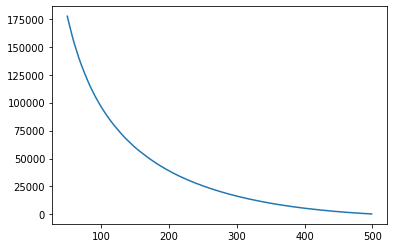

In [23]:
plt.plot(n_,mse)
plt.show

(520, 4096)


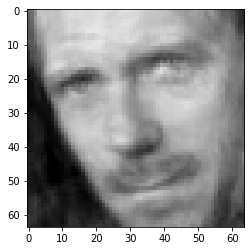

In [23]:
pca_data=(standardized_data.dot(p_vec[:150,:].T))

pca_data=np.array(pca_data)

scaler = StandardScaler().fit(flatten_images)

predicted_image = np.dot(pca_data, p_vec[:150,:])
predicted_image=np.real(predicted_image)    
predicted_image=scaler.inverse_transform(predicted_image)

    
plt.imshow(predicted_image[115].reshape(64, 64),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));

NameError: name 'labels' is not defined

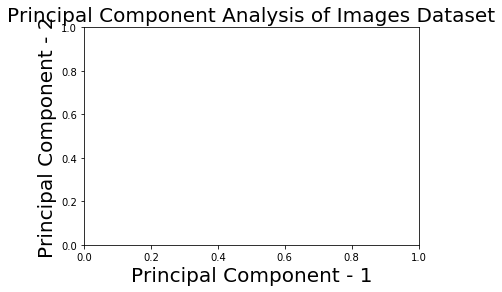

In [24]:
plt.figure()
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Images Dataset",fontsize=20)
targets = [i for i in range(8)]
colors = ['r', 'b', 'g', 'm', 'c', 'y', 'w', 'k']
for target, color in zip(targets,colors):
    indicesToKeep = labels == target
    plt.scatter(Y[indicesToKeep, 0]
               , Y[indicesToKeep, 1], c = color, s = 50)